## Visualization

### Use TL to replace encoder layer of FCN

In [3]:
## Data generation

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\ProgramData\Anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


in starter_4
GPU_STATUS: True


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\transforms\functional.py:126: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


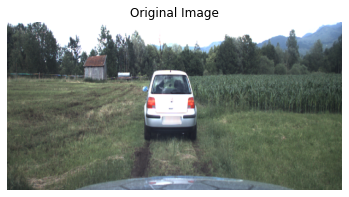

0

In [1]:
from tl_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)

#original image



def vis_orgin(test_loader):
    #TODO: load the best model and complete the rest of the function for testing
    inputimg = []
    with torch.no_grad(): # we don't need to calculate the gradient in the validation/testing
        for iter, (input, label, orgin_img) in enumerate(test_loader):
            inputimg = orgin_img[0]

    plt.axis('off')
    plt.imshow(inputimg)
    plt.title('Original Image')
    plt.show()
    return 0
vis_orgin(test_loader)




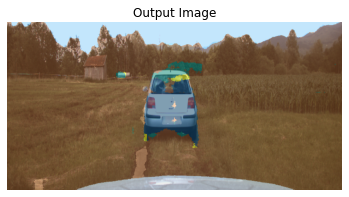

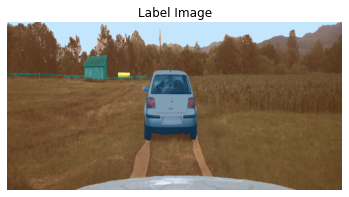

<Figure size 432x288 with 0 Axes>

In [4]:
# 3
visualize("latest_model_3", test_loader, device)
plt.savefig('plots/output3')

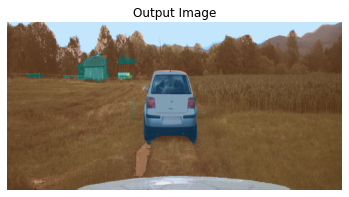

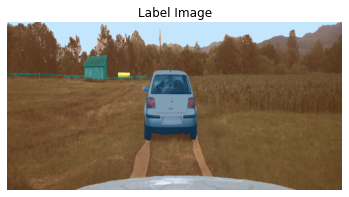

<Figure size 432x288 with 0 Axes>

In [3]:
# 4a
visualize("latest_model_4a", test_loader, device)
plt.savefig('plots/output4a')

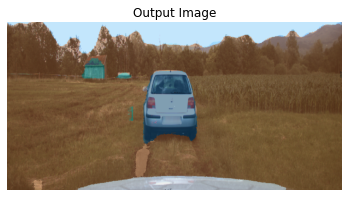

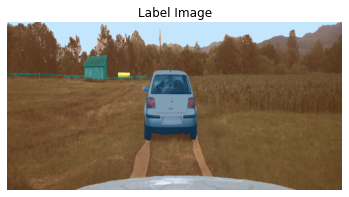

<Figure size 432x288 with 0 Axes>

In [4]:
# 4b
visualize("latest_model_4b", test_loader, device)
plt.savefig('plots/output4b')

in test
Loss :is 0.24420561002833502
IoU is 0.5476699060691276
Pixel is 0.9219242674963815


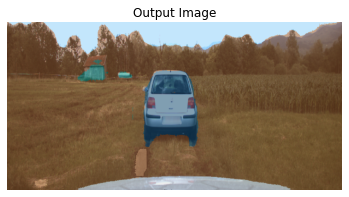

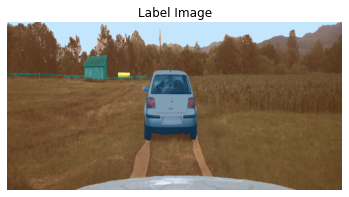

<Figure size 432x288 with 0 Axes>

In [6]:
# 4b-2

def test(model_name):
    print("in test")
    #TODO: load the best model and complete the rest of the function for testing
    fcn_model = torch.load(model_name)

    fcn_model.eval()
    
    losses = []
    mean_iou_scores = []
    accuracy = []

    with torch.no_grad(): # we don't need to calculate the gradient in the validation/testing

        for iter, (inputs, labels, rawimg) in enumerate(test_loader):
    
            # both inputs and labels have to reside in the same device as the model's
            inputs = inputs.to(device) #transfer the input to the same device as the model's
            labels = labels.type(torch.LongTensor).to(device) #transfer the labels to the same device as the model's

            output = fcn_model(inputs)

            loss = criterion(output,labels) #calculate the loss
            losses.append(loss.item()) #call .item() to get the value from a tensor. The tensor can reside in gpu but item() will still work 

            pred = torch.argmax(output, axis = 1) # Make sure to include an argmax to get the prediction from the outputs of your model

            mean_iou_scores.append(np.nanmean(iou_ey(pred, labels, n_class)))  # Complete this function in the util, notice the use of np.nanmean() here
        
            accuracy.append(pixel_acc_ey(pred, labels)) # Complete this function in the util


    print(f"Loss :is {np.mean(losses)}")
    print(f"IoU is {np.mean(mean_iou_scores)}")
    print(f"Pixel is {np.mean(accuracy)}")
    return 0

latest_model = "latest_model_4b_BCE"
test(latest_model)
visualize("latest_model_4b_BCE", test_loader, device)
plt.savefig('plots/output4b')

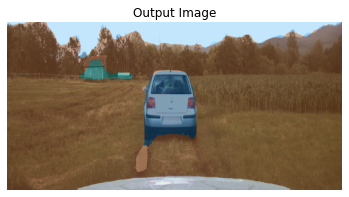

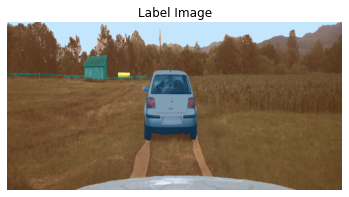

<Figure size 432x288 with 0 Axes>

In [2]:
#5a
visualize("latest_model_5a", test_loader, device)
plt.savefig('plots/output5a')

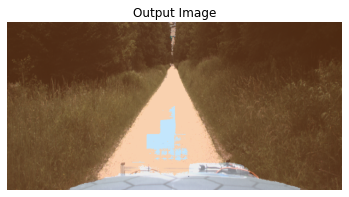

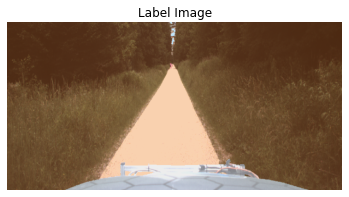

<Figure size 432x288 with 0 Axes>

In [7]:
# 5b
visualize("latest_model_5b", test_loader, device)
plt.savefig('plots/output5b')

in test
Loss :is 0.2237833342873133
IoU is 0.5442751161282172
Pixel is 0.9319662360044626


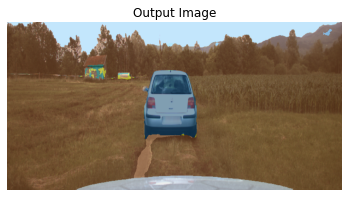

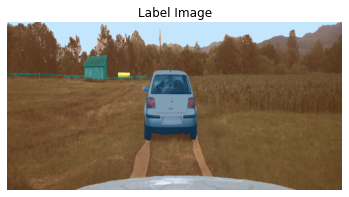

<Figure size 432x288 with 0 Axes>

In [2]:
# 5c - with 4-a
batch_size = 4
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)

def test(model_name):
    print("in test")
    #TODO: load the best model and complete the rest of the function for testing
    fcn_model = torch.load(model_name)

    fcn_model.eval()
    
    losses = []
    mean_iou_scores = []
    accuracy = []

    with torch.no_grad(): # we don't need to calculate the gradient in the validation/testing

        for iter, (inputs, labels, rawimg) in enumerate(test_loader):
    
            # both inputs and labels have to reside in the same device as the model's
            inputs = inputs.to(device) #transfer the input to the same device as the model's
            labels = labels.type(torch.LongTensor).to(device) #transfer the labels to the same device as the model's

            output = fcn_model(inputs)

            loss = criterion(output,labels) #calculate the loss
            losses.append(loss.item()) #call .item() to get the value from a tensor. The tensor can reside in gpu but item() will still work 

            pred = torch.argmax(output, axis = 1) # Make sure to include an argmax to get the prediction from the outputs of your model

            mean_iou_scores.append(np.nanmean(iou_ey(pred, labels, n_class)))  # Complete this function in the util, notice the use of np.nanmean() here
        
            accuracy.append(pixel_acc_ey(pred, labels)) # Complete this function in the util


    print(f"Loss :is {np.mean(losses)}")
    print(f"IoU is {np.mean(mean_iou_scores)}")
    print(f"Pixel is {np.mean(accuracy)}")
    return 0
test("latest_model_5c_2")
visualize("latest_model_5c_2", test_loader, device)
plt.savefig('plots/output5c')

in test
Loss :is 0.24920614063739777
IoU is 0.5316078014182758
Pixel is 0.9228208661079407


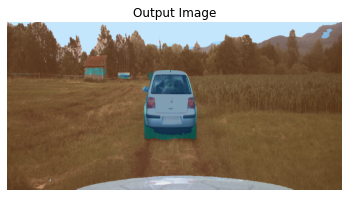

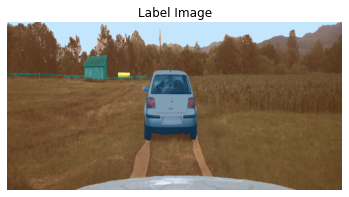

0

In [2]:
# 5c - with dice bce
batch_size = 4
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)

def test(model_name):
    print("in test")
    #TODO: load the best model and complete the rest of the function for testing
    fcn_model = torch.load(model_name)

    fcn_model.eval()
    
    losses = []
    mean_iou_scores = []
    accuracy = []

    with torch.no_grad(): # we don't need to calculate the gradient in the validation/testing

        for iter, (inputs, labels, rawimg) in enumerate(test_loader):
    
            # both inputs and labels have to reside in the same device as the model's
            inputs = inputs.to(device) #transfer the input to the same device as the model's
            labels = labels.type(torch.LongTensor).to(device) #transfer the labels to the same device as the model's

            output = fcn_model(inputs)

            loss = criterion(output,labels) #calculate the loss
            losses.append(loss.item()) #call .item() to get the value from a tensor. The tensor can reside in gpu but item() will still work 

            pred = torch.argmax(output, axis = 1) # Make sure to include an argmax to get the prediction from the outputs of your model

            mean_iou_scores.append(np.nanmean(iou_ey(pred, labels, n_class)))  # Complete this function in the util, notice the use of np.nanmean() here
        
            accuracy.append(pixel_acc_ey(pred, labels)) # Complete this function in the util


    print(f"Loss :is {np.mean(losses)}")
    print(f"IoU is {np.mean(mean_iou_scores)}")
    print(f"Pixel is {np.mean(accuracy)}")
    return 0
test("latest_model_5cwithBCE")
visualize("latest_model_5cwithBCE", test_loader, device)


in test
Loss :is 0.2108980268239975
IoU is 0.5363801579900548
Pixel is 0.9321296306756827


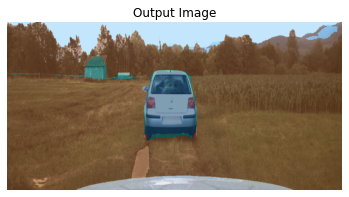

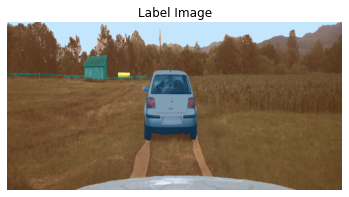

0

In [2]:
# 5c - with dice bce until 80 epochs
batch_size = 4
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)

def test(model_name):
    print("in test")
    #TODO: load the best model and complete the rest of the function for testing
    fcn_model = torch.load(model_name)

    fcn_model.eval()
    
    losses = []
    mean_iou_scores = []
    accuracy = []

    with torch.no_grad(): # we don't need to calculate the gradient in the validation/testing

        for iter, (inputs, labels, rawimg) in enumerate(test_loader):
    
            # both inputs and labels have to reside in the same device as the model's
            inputs = inputs.to(device) #transfer the input to the same device as the model's
            labels = labels.type(torch.LongTensor).to(device) #transfer the labels to the same device as the model's

            output = fcn_model(inputs)

            loss = criterion(output,labels) #calculate the loss
            losses.append(loss.item()) #call .item() to get the value from a tensor. The tensor can reside in gpu but item() will still work 

            pred = torch.argmax(output, axis = 1) # Make sure to include an argmax to get the prediction from the outputs of your model

            mean_iou_scores.append(np.nanmean(iou_ey(pred, labels, n_class)))  # Complete this function in the util, notice the use of np.nanmean() here
        
            accuracy.append(pixel_acc_ey(pred, labels)) # Complete this function in the util


    print(f"Loss :is {np.mean(losses)}")
    print(f"IoU is {np.mean(mean_iou_scores)}")
    print(f"Pixel is {np.mean(accuracy)}")
    return 0
test("latest_model_5c_80epoch")
visualize("latest_model_5c_80epoch", test_loader, device)